In [1]:
from requests import get

url = 'http://www.imdb.com/search/title?release_date=2018&sort=num_votes,desc&page=1'

response = get(url)
print(response.text[:500])




<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle"


In [2]:
from bs4 import BeautifulSoup

html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [3]:
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


In [4]:
first_movie = movie_containers[0]
first_movie

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt4154756"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt4154756/?ref_=adv_li_i"> <img alt="Avengers: Infinity War" class="loadlate" data-tconst="tt4154756" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BMjMxNjY2MDU1OV5BMl5BanBnXkFtZTgwNzY1MTUwNTM@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB470041630_.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt4154756/?ref_=adv_li_tt">Avengers: Infinity War</a>
<span class="lister-item-year text-muted unbold">(2018)</span>
</h3>
<p class="text-muted ">
<span class="certificate">B</span>
<span class="ghost">|</span>
<span class="runtime">149 min</span>
<span class="ghost">|

In [5]:
first_movie.div

<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt4154756"></div>
</div>

In [6]:
first_movie.a

<a href="/title/tt4154756/?ref_=adv_li_i"> <img alt="Avengers: Infinity War" class="loadlate" data-tconst="tt4154756" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BMjMxNjY2MDU1OV5BMl5BanBnXkFtZTgwNzY1MTUwNTM@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB470041630_.png" width="67"/>
</a>

In [7]:
first_movie.h3

<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt4154756/?ref_=adv_li_tt">Avengers: Infinity War</a>
<span class="lister-item-year text-muted unbold">(2018)</span>
</h3>

In [8]:
first_movie.h3.a

<a href="/title/tt4154756/?ref_=adv_li_tt">Avengers: Infinity War</a>

In [9]:
first_name = first_movie.h3.a.text
first_name

'Avengers: Infinity War'

In [10]:
first_year = first_movie.h3.find('span', class_ = 'lister-item-year text-muted unbold')
first_year

<span class="lister-item-year text-muted unbold">(2018)</span>

In [11]:
first_year = first_year.text
first_year

'(2018)'

In [12]:
first_movie.strong

<strong>8.6</strong>

In [13]:
first_imdb = float(first_movie.strong.text)
first_imdb

8.6

In [14]:
first_mscore = first_movie.find('span', class_ = 'metascore favorable')

first_mscore = int(first_mscore.text)
print(first_mscore)

68


In [15]:
first_votes = first_movie.find('span', attrs = {'name':'nv'})
first_votes

<span data-value="500568" name="nv">500,568</span>

In [16]:
first_votes['data-value']

'500568'

In [17]:
first_votes['data-value']

'500568'

In [18]:
eighth_movie_mscore = movie_containers[7].find('div', class_ = 'ratings-metascore')
type(eighth_movie_mscore)

bs4.element.Tag

In [19]:
# Listas para almacenar los datos raspados 
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Extraer datos de contenedor de película individual
for container in movie_containers:

    # Si la película tiene Metascore, entonces extraiga:
    if container.find('div', class_ = 'ratings-metascore') is not None:

        # El nombre
        name = container.h3.a.text
        names.append(name)

        # El año
        year = container.h3.find('span', class_ = 'lister-item-year').text
        years.append(year)

        # Rating IMDB 
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)

        # Metascore
        m_score = container.find('span', class_ = 'metascore').text
        metascores.append(int(m_score))

        # Número de votos
        vote = container.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))

# Analizando los datos

In [20]:
import pandas as pd
#Crear un DataFrame con los datos obtenidos
test_df = pd.DataFrame({'movie': names,
                       'year': years,
                       'imdb': imdb_ratings,
                       'metascore': metascores,
                       'votes': votes})
print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
movie        42 non-null object
year         42 non-null object
imdb         42 non-null float64
metascore    42 non-null int64
votes        42 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.7+ KB
None


movie        year  imdb  metascore  \
0                     Avengers: Infinity War      (2018)   8.6         68   
1                              Pantera Negra      (2018)   7.4         88   
2                                 Deadpool 2      (2018)   7.9         66   
3        Ready Player One: comienza el juego      (2018)   7.6         64   
4                       Un lugar en silencio      (2018)   7.7         82   
5                               Aniquilación      (2018)   6.9         79   
6             Jurassic world: el reino caído      (2018)   6.3         51   
7        Han Solo: una historia de Star Wars      (2018)   7.0         62   
8            Misión: Imposible - Repercusión      (2018)   8.0         86   
9   Tomb Raider: Las aventuras de Lara Croft      (2018)   6.4         48   
10                           Noche de juegos  (I) (2018)   7.0         66   
11                      Ant-Man and the Wasp      (2018)   7.3         70   
12                     Operación Red Sparrow      (2018)   6.6         53   
13                          Los increíbles 2      (2018)   8.0         80   
14                Ocean's 8: las estafadoras      (2018)   6.3         61   
15                      El legado del diablo      (2018)   7.3         87   
16                      Rampage: devastación      (2018)   6.2         45   
17                            Isla de perros      (2018)   8.0         82   
18               Maze Runner: la cura mortal      (2018)   6.3         51   
19     Titanes del Pacífico: la insurrección      (2018)   5.7         44   
20                   The Cloverfield Paradox      (2018)   5.6         37   
21                                     Venom      (2018)   7.1         35   
22                               El pasajero  (I) (2018)   6.3         56   
23                              Yo soy Simón      (2018)   7.7         72   
24                  Upgrade: máquina asesina      (2018)   7.6         67   
25                          El robo perfecto      (2018)   7.0         49   
26                  Sicario: día del soldado      (2018)   7.2         61   
27                                 Megalodón      (2018)   6.0         46   
28                               ¡Te atrapé!  (I) (2018)   6.6         56   
29       Rascacielos: rescate en las alturas      (2018)   5.9         51   
30                                  La monja      (2018)   5.7         46   
31                          No me las toquen      (2018)   6.2         69   
32         To All the Boys I've Loved Before      (2018)   7.4         64   
33                           Tropa de héroes      (2018)   6.6         54   
34                            Deseo de matar      (2018)   6.4         31   
35                  El infiltrado del KKKlan      (2018)   7.8         83   
36               Cincuenta sombras liberadas      (2018)   4.4         31   
37     La noche del demonio: la última llave      (2018)   5.7         49   
38                 Mamma mia! vamos otra vez      (2018)   7.1         60   
39                             El depredador      (2018)   5.9         48   
40                            A Star Is Born      (2018)   8.5         88   
41                     Locamente millonarios      (2018)   7.5         74   

     votes  
0   500568  
1   398444  
2   279260  
3   229095  
4   216560  
5   174613  
6   156648  
7   155537  
8   140655  
9   132293  
10  119756  
11  117938  
12  107199  
13  104275  
14   91037  
15   90515  
16   86397  
17   74374  
18   74103  
19   72604  
20   72590  
21   65766  
22   64223  
23   62321  
24   59594  
25   53203  
26   52722  
27   50553  
28   49895  
29   45736  
30   43344  
31   41564  
32   38831  
33   38674  
34   37764  
35   35909  
36   35124  
37   34475  
38   34250  
39   33206  
40   32952  
41   30204

# Recuperar información de varias páginas

In [21]:
headers = {"Accept-Language": "en-US, en;q=0.5"}

In [22]:
#Número de páginas a análizar
pages = [str(i) for i in range(1,5)]
#Rango de años
years_url = [str(i) for i in range(2017,2019)]

In [23]:
from time import sleep
from random import randint

In [24]:
from time import time

start_time = time()
requests = 0

for _ in range(5):
    # Una solicitud iría aquí
    requests += 1
    sleep(randint(1,3))
    elapsed_time = time() - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))

Request: 1; Frequency: 0.33297212366358375 requests/s
Request: 2; Frequency: 0.49942051058533404 requests/s
Request: 3; Frequency: 0.4280778144288918 requests/s
Request: 4; Frequency: 0.39953686992933524 requests/s
Request: 5; Frequency: 0.3841718033937662 requests/s


In [25]:
from IPython.core.display import clear_output

start_time = time()
requests = 0

for _ in range(5):
    # Una solicitud iría aquí
    requests += 1
    sleep(randint(1,3))
    current_time = time()
    elapsed_time = current_time - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
    clear_output(wait = True)

Request: 5; Frequency: 0.7123254449376166 requests/s


In [26]:
# Redeclarar las listas para almacenar datos
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Preparando el seguimiento del bucle
start_time = time()
requests = 0

# Por cada año en el intervalo 2017-2018.
for year_url in years_url:

    # Para cada página en el intervalo 1-4
    for page in pages:

        # Hacer una solicitud de obtención
        response = get('http://www.imdb.com/search/title?release_date=' + year_url + 
        '&sort=num_votes,desc&page=' + page, headers = headers)

        # Pausar el bucle
        sleep(randint(8,15))

         # Monitorear las solicitudes
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)

        # Lanzar una advertencia para códigos de estado que no sean 200
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))

        # Romper el ciclo si el número de solicitudes es mayor que el esperado
        if requests > 72:
            warn('Number of requests was greater than expected.')  
            break 

        # Analizar el contenido de la solicitud con BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Seleccione todos los 50 contenedores de películas de una sola página
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

         # Para cada película de estos 50
        for container in mv_containers:
             # Si la película tiene un Metascore, entonces:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                # Scrape el nombre 
                name = container.h3.a.text
                names.append(name)

                # Scrape el año 
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                # Scrape el rating IMDB 
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                # Scrape el Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

                # Scrape el número de votos
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))

Request:8; Frequency: 0.06544076885489195 requests/s


In [27]:
movie_ratings = pd.DataFrame({'movie': names,
                              'year': years,
                              'imdb': imdb_ratings,
                              'metascore': metascores,
                              'votes': votes})
print(movie_ratings.info())
movie_ratings.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 5 columns):
movie        261 non-null object
year         261 non-null object
imdb         261 non-null float64
metascore    261 non-null int64
votes        261 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 10.3+ KB
None


movie        year  imdb  metascore   votes
0                           Logan      (2017)   8.1         77  512539
1                    Wonder Woman      (2017)   7.5         76  439776
2                         Dunkirk      (2017)   8.0         94  422077
3        Star Wars: The Last Jedi      (2017)   7.2         85  419116
4  Guardians of the Galaxy Vol. 2      (2017)   7.7         67  414818
5                  Thor: Ragnarok      (2017)   7.9         74  392332
6          Spider-Man: Homecoming      (2017)   7.5         73  362042
7                         Get Out  (I) (2017)   7.7         84  335900
8               Blade Runner 2049      (2017)   8.0         81  335372
9                     Baby Driver      (2017)   7.6         86  327207

In [28]:
movie_ratings = movie_ratings[['movie', 'year', 'imdb', 'metascore', 'votes']]
movie_ratings.head()

movie    year  imdb  metascore   votes
0                           Logan  (2017)   8.1         77  512539
1                    Wonder Woman  (2017)   7.5         76  439776
2                         Dunkirk  (2017)   8.0         94  422077
3        Star Wars: The Last Jedi  (2017)   7.2         85  419116
4  Guardians of the Galaxy Vol. 2  (2017)   7.7         67  414818

In [29]:
movie_ratings['year'].unique()

array(['(2017)', '(I) (2017)', '(III) (2017)', '(II) (2017)', '(2018)',
       '(I) (2018)', '(III) (2018)', '(II) (2018)'], dtype=object)

In [30]:
movie_ratings.loc[:, 'year'] = movie_ratings['year'].str[-5:-1].astype(int)

In [31]:
movie_ratings['year'].head(3)

0    2017
1    2017
2    2017
Name: year, dtype: int64

In [32]:
movie_ratings.describe().loc[['min', 'max'], ['imdb', 'metascore']]

imdb  metascore
min   3.0       12.0
max   8.6       94.0

In [33]:
movie_ratings['n_imdb'] = movie_ratings['imdb'] * 10
movie_ratings.head(3)

movie  year  imdb  metascore   votes  n_imdb
0         Logan  2017   8.1         77  512539    81.0
1  Wonder Woman  2017   7.5         76  439776    75.0
2       Dunkirk  2017   8.0         94  422077    80.0

In [34]:
movie_ratings.to_csv('movie_ratings.csv')

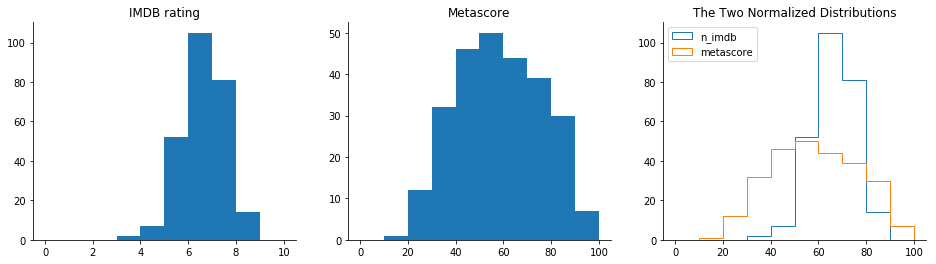

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes

ax1.hist(movie_ratings['imdb'], bins = 10, range = (0,10)) # bin rango = 1
ax1.set_title('IMDB rating')

ax2.hist(movie_ratings['metascore'], bins = 10, range = (0,100)) # bin rango = 10
ax2.set_title('Metascore')

ax3.hist(movie_ratings['n_imdb'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings['metascore'], bins = 10, range = (0,100), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')

for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()